# Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import dill as pickle
import sys

In [2]:
sys.path.append("/home/sina/env_prediction_project/Trajectron-plus-plus/trajectron")
sys.path.append("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians")

# Open and load the .pkl file
with open("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.pkl", "rb") as file:
    env = pickle.load(file, encoding='latin1')

# # Print the attributes of the env object
# for attribute in dir(env):
#     if not attribute.startswith('__'):
#         print(attribute)
#         try:
#             value = getattr(env, attribute)
#             print(f"{attribute}: {value}")
#         except:
#             None

In [3]:
env.scenes

[Scene: Duration: 464.40000000000003s, Nodes: 360, Map: No.]

In [4]:
# # Get the first scene (assuming there's only one)
# scene = env.scenes[0]

# # Print basic scene info
# print(f"Scene Timesteps: {scene.timesteps}")
# print(f"Number of Nodes (agents): {len(scene.nodes)}")
# print(f"Node Types Present: {[node.type.name for node in scene.nodes]}")

# # Get the first pedestrian
# node_type = "PEDESTRIAN"
# pedestrian_nodes = [node for node in scene.nodes if node.type.name == node_type]

# # Print how many pedestrians are in the scene
# print(f"Number of Pedestrians: {len(pedestrian_nodes)}")

# # Choose the first pedestrian
# pedestrian = pedestrian_nodes[0]
# print(f"Selected Pedestrian: {pedestrian.id}")



In [5]:
sys.path.append("/home/sina/env_prediction_project/Trajectron-plus-plus/trajectron")
sys.path.append("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians")

ped_id = 24


# Open and load the .pkl file
with open("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.pkl", "rb") as file:
    env = pickle.load(file, encoding='latin1')


# Get the first scene
scene = env.scenes[0]
print(f"Scene has {scene.timesteps} timesteps.")

# Get all pedestrians in the scene
pedestrian_nodes = [node for node in scene.nodes if node.type.name == "PEDESTRIAN"]
print(f"Scene has {len(pedestrian_nodes)} nodes (pedestrians).")

# Select the pedestrian
target_pedestrian = next(ped for ped in pedestrian_nodes if ped.id == str(ped_id))
print(f"Selected Pedestrian ID: {target_pedestrian.id}")

Scene has 1161 timesteps.
Scene has 360 nodes (pedestrians).
Selected Pedestrian ID: 24


Using state key: position


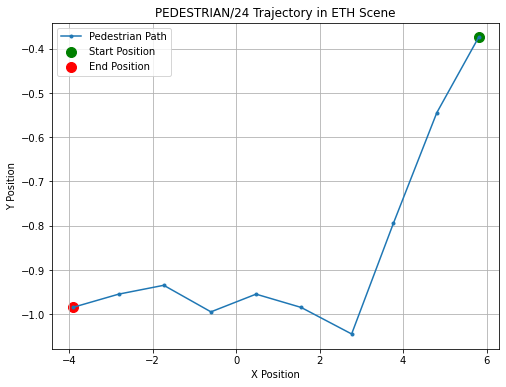

In [7]:
# Get the state data for the pedestrian and plot it
state_key = 'position'

model_path = "/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3"

with open(f"{model_path}/config.json", 'r') as config_file:
    hyperparams = json.load(config_file)

# Define the state type
print(f"Using state key: {state_key}")

ground_truth = []
timesteps = np.arange(scene.timesteps)

for t in timesteps:
    try:
        gt_x = target_pedestrian.data[t, ('position', 'x')] 
        gt_y = target_pedestrian.data[t, ('position', 'y')]
        
        if not np.isnan(gt_x) and not np.isnan(gt_y):
            ground_truth.append([t, gt_x, gt_y])
    except Exception as e:
        # print(f"Error at timestep {t}: {e}")
        None

# Extract x and y positions
x_positions = [pos[1] for pos in ground_truth]
y_positions = [pos[2] for pos in ground_truth]

# Create a scatter plot of pedestrian positions (x, y)
plt.figure(figsize=(8, 6))
plt.plot(x_positions, y_positions, marker="o", linestyle="-", markersize=3, label="Pedestrian Path")

# Label the first and last positions
plt.scatter(x_positions[0], y_positions[0], color="green", s=100, label="Start Position")
plt.scatter(x_positions[-1], y_positions[-1], color="red", s=100, label="End Position")

# Titles and labels
plt.title(f"{target_pedestrian} Trajectory in ETH Scene")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [8]:
from evaluate import load_model

sys.path.append("/home/sina/env_prediction_project/Trajectron-plus-plus/trajectron")
sys.path.append("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians")


eval_stg, hyperparams = load_model("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3", env, ts=32)
scene = env.scenes[0]
timesteps = np.arange(scene.timesteps)


predictions = eval_stg.predict(scene,
                                timesteps,
                                1,
                                num_samples=1,
                                min_history_timesteps=1,
                                min_future_timesteps=1,
                                z_mode=False,
                                gmm_mode=False,
                                full_dist=False)


Loading from /home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3/model_registrar-32.pt
Loaded!



In [57]:
# scene
timesteps

array([   0,    1,    2, ..., 1158, 1159, 1160])

In [9]:
predictions

{1: {PEDESTRIAN/1: array([[[[ 5.298157, -1.332073]]]], dtype=float32)},
 2: {PEDESTRIAN/1: array([[[[ 6.4417815, -1.0388678]]]], dtype=float32)},
 3: {PEDESTRIAN/1: array([[[[ 7.6499586, -0.611772 ]]]], dtype=float32),
  PEDESTRIAN/2: array([[[[5.678319  , 0.41938472]]]], dtype=float32)},
 4: {PEDESTRIAN/2: array([[[[5.335853 , 0.6098991]]]], dtype=float32)},
 5: {PEDESTRIAN/2: array([[[[4.031532  , 0.83516204]]]], dtype=float32)},
 6: {PEDESTRIAN/2: array([[[[3.5259576, 1.2497559]]]], dtype=float32),
  PEDESTRIAN/3: array([[[[6.1296253, 1.6181034]]]], dtype=float32)},
 7: {PEDESTRIAN/2: array([[[[2.7834473, 1.2785687]]]], dtype=float32),
  PEDESTRIAN/3: array([[[[4.768748 , 1.3872056]]]], dtype=float32)},
 8: {PEDESTRIAN/2: array([[[[1.882777 , 1.3342803]]]], dtype=float32),
  PEDESTRIAN/3: array([[[[4.4057126, 1.4558337]]]], dtype=float32),
  PEDESTRIAN/4: array([[[[-4.7200003 , -0.21300313]]]], dtype=float32),
  PEDESTRIAN/5: array([[[[-4.8166428 , -0.97555256]]]], dtype=float32),
 

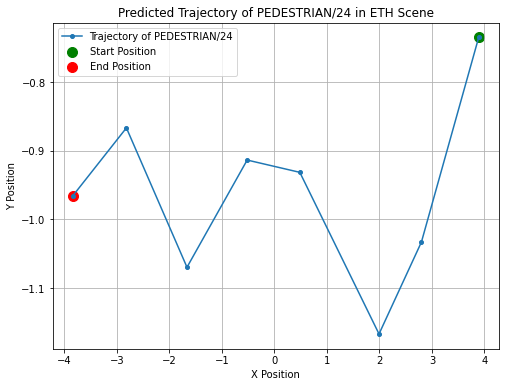

In [ ]:
# Extract x, y coordinates for all timesteps
timesteps = []
x_coords = []
y_coords = []

for t, pedestrians in predictions.items():
    if target_pedestrian in pedestrians:
        x, y = pedestrians[target_pedestrian].squeeze()  # Remove extra dimensions
        timesteps.append(t)
        x_coords.append(x)
        y_coords.append(y)


# Create the plot
plt.figure(figsize=(8, 6))

# Plot the pedestrian trajectory
plt.plot(x_coords, y_coords, marker="o", linestyle="-", markersize=4, label=f"Trajectory of {target_pedestrian}")

# Mark start and end positions
plt.scatter(x_coords[0], y_coords[0], color="green", s=100, label="Start Position")
plt.scatter(x_coords[-1], y_coords[-1], color="red", s=100, label="End Position")

# Titles and labels
plt.title(f"Predicted Trajectory of {target_pedestrian} in ETH Scene")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
# predictions -> prediction_output_to_trajectories(first argument)
# output: output_dict, histories_dict, futures_dict

# Show inside pytorch model

In [6]:
import torch

model_data = torch.load("/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3/model_registrar-32.pt")
print(type(model_data))

for name, module in model_data.items():
    print(f"Module name: {name}")
    print(module)

<class 'torch.nn.modules.container.ModuleDict'>
Module name: PEDESTRIAN/node_history_encoder
LSTM(6, 32, batch_first=True)
Module name: PEDESTRIAN/node_future_encoder
LSTM(2, 32, batch_first=True, bidirectional=True)
Module name: PEDESTRIAN/node_future_encoder/initial_h
Linear(in_features=6, out_features=32, bias=True)
Module name: PEDESTRIAN/node_future_encoder/initial_c
Linear(in_features=6, out_features=32, bias=True)
Module name: PEDESTRIAN/edge_influence_encoder
AdditiveAttention(
  (w1): Linear(in_features=32, out_features=32, bias=False)
  (w2): Linear(in_features=32, out_features=32, bias=False)
  (v): Linear(in_features=32, out_features=1, bias=False)
)
Module name: PEDESTRIAN/p_z_x
Linear(in_features=64, out_features=32, bias=True)
Module name: PEDESTRIAN/hx_to_z
Linear(in_features=32, out_features=25, bias=True)
Module name: PEDESTRIAN/hxy_to_z
Linear(in_features=192, out_features=25, bias=True)
Module name: PEDESTRIAN/decoder/state_action
Sequential(
  (0): Linear(in_featur

# Graphically view inside .pt file

In [12]:
!pip install netron
import netron

model_path = "/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3/model_registrar-32.pt" 
netron.start(model_path)

Serving '/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3/model_registrar-32.pt' at http://localhost:24050


('localhost', 24050)

# Ground truth

In [18]:
import dill

# Load the dataset
data_path = "/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.pkl"
with open(data_path, 'rb') as f:
    env = dill.load(f, encoding='latin1')  # Load the full dataset


In [ ]:
scenes = env.scenes
scene = scenes[0]
timestep = 10 
nodes_at_timestep = scene.nodes
nodes_at_timestep[0]


PEDESTRIAN/1

In [34]:
dir(scene)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_robot_from_nodes',
 'aug_func',
 'augment',
 'calculate_scene_graph',
 'description',
 'dt',
 'duration',
 'frequency_multiplier',
 'get_clipped_input_dict',
 'get_node_by_id',
 'get_nodes_clipped_at_time',
 'get_scene_graph',
 'map',
 'name',
 'nodes',
 'non_aug_scene',
 'present_nodes',
 'robot',
 'sample_timesteps',
 'temporal_scene_graph',
 'timesteps']